         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


Descriptive Statistics: 
                    Mean  Median  Standard Deviation  Skewness   Kurtosis
date                 NaN     NaN                 NaN       NaN        NaN
precipitation   3.029432     0.0            6.680194  3.505644  15.522178
temp_max       16.439083    15.6            7.349758  0.280930  -0.690467
temp_min        8.234771     8.3            5.023004 -0.249459  -0.600573
wind            3.241136     3.0            1.437825  0.891668   0.803961
weather              NaN     NaN                 NaN       NaN        NaN


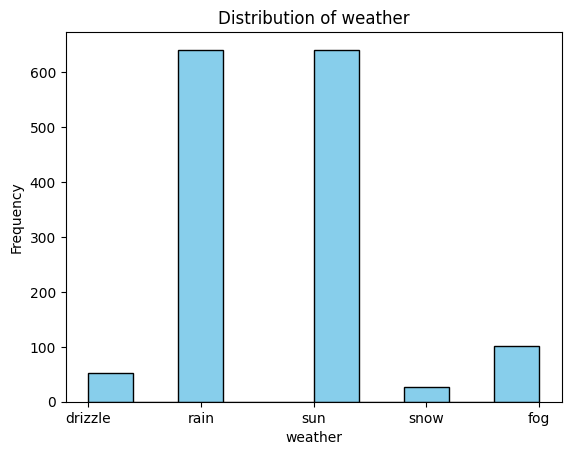

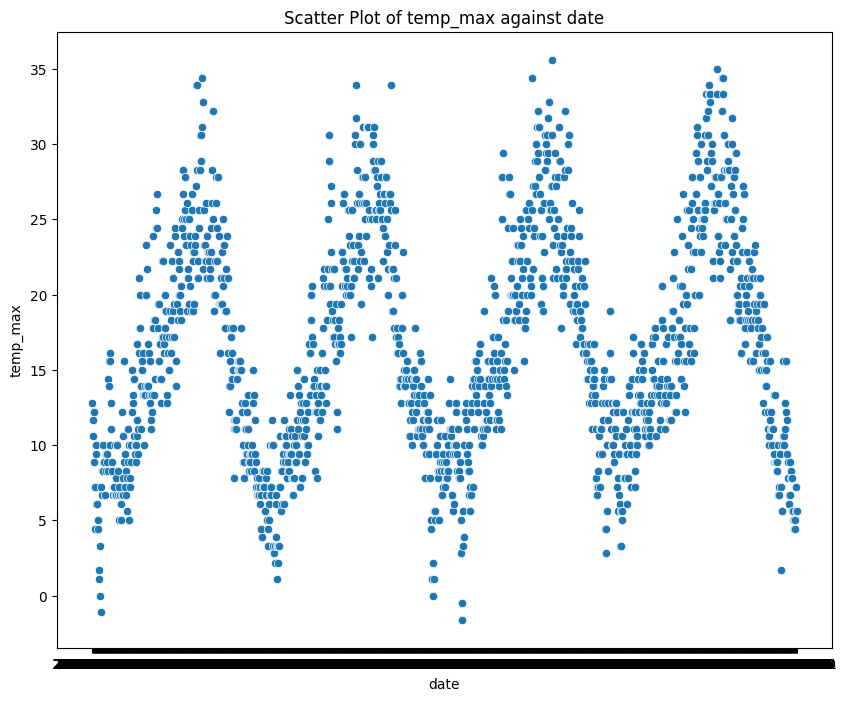

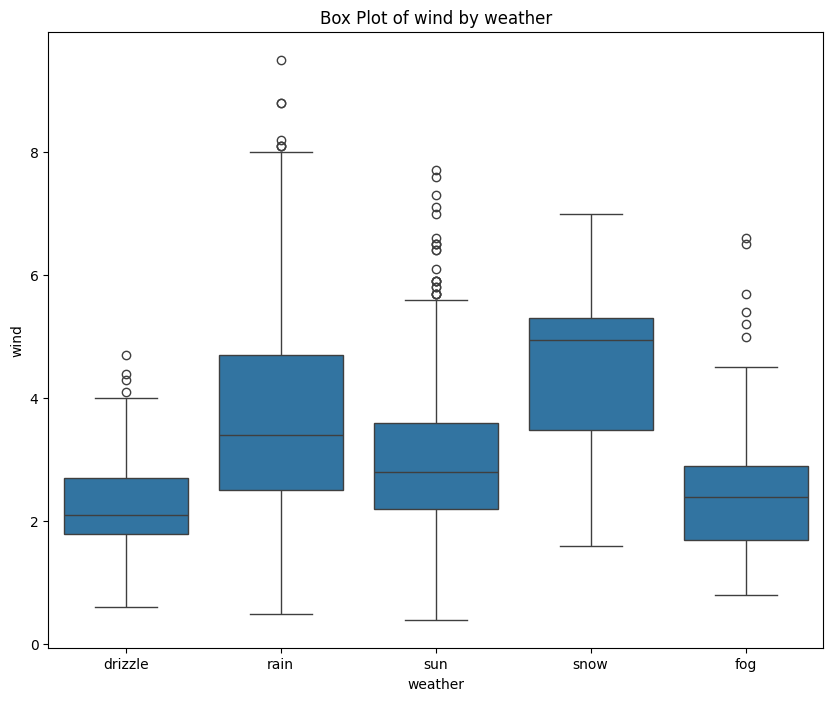

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_dataset(file_path):
    return pd.read_csv(file_path)

def display_first_rows(dataframe):
    print(dataframe.head())

def check_missing_values(dataframe):
    return dataframe.isnull().sum()

def drop_missing_values(dataframe):
    dataframe.dropna(inplace=True)

def calculate_moments(dataframe):
    # Convert non-numeric values to NaN
    dataframe = dataframe.apply(pd.to_numeric, errors='coerce')
    
    # Calculate moments for numerical features
    moments = dataframe.describe().transpose()[['mean', '50%', 'std']]
    skewness = dataframe.skew()
    kurtosis = dataframe.kurtosis()
    
    # Concatenate results into a DataFrame
    statistics_df = pd.concat([moments, skewness, kurtosis], axis=1)
    statistics_df.columns = ['Mean', 'Median', 'Standard Deviation', 'Skewness', 'Kurtosis']
    
    return statistics_df

def create_histogram(data, column):
    plt.hist(data[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

def create_density_plot(data, column):
    sns.kdeplot(data[column], shade=True, color='skyblue')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

def create_scatter_plot(data, x_column, y_column):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=x_column, y=y_column, data=data)
    plt.title(f'Scatter Plot of {y_column} against {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()
    
def create_box_plot(data, x_column, y_column):
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=x_column, y=y_column, data=data)
    plt.title(f'Box Plot of {y_column} by {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

# Load the dataset
dataset_df = load_dataset('seattle-weather.csv')

# Display the first few rows of the dataset
display_first_rows(dataset_df)
print("\n")

# Check for missing values
missing_values = check_missing_values(dataset_df)

# Drop rows with missing values
drop_missing_values(dataset_df)

# Calculate and display major moments for numerical features
statistics_df = calculate_moments(dataset_df)
print("Descriptive Statistics: ")
print(statistics_df)

# Create histogram for weather
create_histogram(dataset_df, 'weather')

# Create scatter plot for date vs temp_max
create_scatter_plot(dataset_df, 'date', 'temp_max')

# Create box plot for weather vs wind
create_box_plot(dataset_df, 'weather', 'wind')